# Insert data in the table

In [5]:
import psycopg2
from faker import Faker

def create_additional_tables():
    conn = psycopg2.connect(
        host="localhost",
        database="postgres",
        port="5433",
        user="postgres",
        password="qwerty"
    )
    cursor = conn.cursor()

    # Create the Doctors table
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS Doctors (
            doctor_id SERIAL PRIMARY KEY,
            first_name VARCHAR(50),
            last_name VARCHAR(50),
            specialization VARCHAR(100)
        );
    """)

    # Create the Patients table
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS Patients (
            patient_id SERIAL PRIMARY KEY,
            first_name VARCHAR(50),
            last_name VARCHAR(50),
            age INT
        );
    """)

    # Create the Visits table
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS Visits (
            visit_id SERIAL PRIMARY KEY,
            patient_id INT,
            visit_date DATE,
            diagnosis VARCHAR(200),
            FOREIGN KEY (patient_id) REFERENCES Patients (patient_id)
        );
    """)

    # Create the DoctorVisits table
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS DoctorVisits (
            doctor_id INT,
            visit_id INT,
            FOREIGN KEY (doctor_id) REFERENCES Doctors (doctor_id),
            FOREIGN KEY (visit_id) REFERENCES Visits (visit_id)
        );
    """)

    conn.commit()
    cursor.close()
    conn.close()

def insert_rows_if_not_exists(database, user, password, host, port, table_name):
    conn = psycopg2.connect(database=database, user=user, password=password, host=host, port=port)
    cur = conn.cursor()
    fake = Faker()

    # Check if rows exist in the table
    cur.execute(f"SELECT COUNT(*) FROM {table_name};")
    row_count = cur.fetchone()[0]

    if row_count == 0:
        # Insert 100 rows with distinct values into the table
        for _ in range(100):
            # Generate fake data
            # Modify the code below to match the columns and data types of your table
            if table_name == 'Doctors':
                data1 = fake.first_name()
                data2 = fake.last_name()
                data3 = fake.job()
                cur.execute(f"INSERT INTO {table_name} (first_name, last_name, specialization) VALUES (%s, %s, %s);",
                            (data1, data2, data3))
            elif table_name == 'Patients':
                data1 = fake.first_name()
                data2 = fake.last_name()
                data3 = fake.random_int(min=18, max=80)
                cur.execute(f"INSERT INTO {table_name} (first_name, last_name, age) VALUES (%s, %s, %s);",
                            (data1, data2, data3))
            elif table_name == 'Visits':
                data1 = fake.random_int(min=1, max=100)  # Assuming patient_id has values from 1 to 100
                data2 = fake.date_between(start_date='-1y', end_date='today')
                data3 = fake.sentence(nb_words=6)
                cur.execute(f"INSERT INTO {table_name} (patient_id, visit_date, diagnosis) VALUES (%s, %s, %s);",
                            (data1, data2, data3))
            elif table_name == 'DoctorVisits':
                data1 = fake.random_int(min=1, max=100)  # Assuming doctor_id has values from 1 to 100
                data2 = fake.random_int(min=1, max=100)  # Assuming visit_id has values from 1 to 100
                cur.execute(f"INSERT INTO {table_name} (doctor_id, visit_id) VALUES (%s, %s);",
                            (data1, data2))

        conn.commit()

    cur.close()
    conn.close()


# Database connection details
database = 'postgres'
user = 'postgres'
password = 'qwerty'
host = 'localhost'
port = '5433'

# Create additional tables
create_additional_tables()

# Insert rows into each table
table_names = ['Doctors', 'Patients', 'Visits', 'DoctorVisits']  # Replace with your table names
for table_name in table_names:
    insert_rows_if_not_exists(database, user, password, host, port, table_name)


# To drop all the tables

In [4]:
import psycopg2

def drop_tables(database, user, password, host, port):
    conn = psycopg2.connect(database=database, user=user, password=password, host=host, port=port)
    cur = conn.cursor()

    # Drop the DoctorVisits table
    cur.execute("DROP TABLE IF EXISTS DoctorVisits;")
    # Drop the Visits table
    cur.execute("DROP TABLE IF EXISTS Visits;")
    # Drop the Doctors table
    cur.execute("DROP TABLE IF EXISTS Doctors;")
    # Drop the Patients table
    cur.execute("DROP TABLE IF EXISTS Patients;")

    conn.commit()
    cur.close()
    conn.close()

drop_tables(database, user, password, host, port)


# Increasing cardinality and other proporties

In [6]:
from faker import Faker

fake = Faker()

def increase_cardinality(database, user, password, host, port, table_name, column_name):
    conn = psycopg2.connect(database=database, user=user, password=password, host=host, port=port)
    cur = conn.cursor()

    # Get the distinct values of the column
    cur.execute(f"SELECT DISTINCT {column_name} FROM {table_name};")
    distinct_values = cur.fetchall()

    # Get the number of distinct values
    current_cardinality = len(distinct_values)

    # Generate and insert additional rows with distinct values
    additional_rows = 100  # Number of additional rows to insert
    for i in range(current_cardinality + 1, current_cardinality + additional_rows + 1):
        # Generate a new distinct value
        fake_value = fake.unique.first_name()

        # Insert the new row into the table
        cur.execute(f"INSERT INTO {table_name} ({column_name}) SELECT %s WHERE NOT EXISTS (SELECT 1 FROM {table_name} WHERE {column_name} = %s);", (fake_value, fake_value))

    conn.commit()
    cur.close()
    conn.close()


In [7]:
increase_cardinality(database, user, password, host, port, 'patients', 'first_name')

# increase querry count

In [13]:
import psycopg2

def increase_query_count(database, user, password, host, port, table_name, column_name):
    conn = psycopg2.connect(database=database, user=user, password=password, host=host, port=port)
    cur = conn.cursor()

    # Add the query_count column if it doesn't exist
    cur.execute(f"ALTER TABLE {table_name} ADD COLUMN IF NOT EXISTS query_count INTEGER DEFAULT 0;")

    # Increase the query count for the first_name column in the patients table
    cur.execute(f"UPDATE {table_name} SET query_count = query_count + 1 WHERE {column_name} IS NOT NULL;")

    conn.commit()
    cur.close()
    conn.close()


In [14]:
increase_query_count(database, user, password, host, port, 'patients', 'first_name')


Table: query_log, Column: query_id, Data Type: integer, Query Count: 60, Cardinality: 4
Reason: The column meets the minimum criteria.
-----------------------------------
Table: query_log, Column: query_text, Data Type: text, Query Count: 60, Cardinality: 2
Reason: The column meets the minimum criteria.
-----------------------------------
Table: visits, Column: visit_id, Data Type: integer, Query Count: 178, Cardinality: 100
Reason: The column is frequently queried.
-----------------------------------
Table: visits, Column: patient_id, Data Type: integer, Query Count: 178, Cardinality: 66
Reason: The column is frequently queried.
-----------------------------------
Table: visits, Column: visit_date, Data Type: date, Query Count: 178, Cardinality: 90
Reason: The column is frequently queried.
-----------------------------------
Table: visits, Column: diagnosis, Data Type: character varying, Query Count: 178, Cardinality: 100
Reason: The column is frequently queried.
---------------------

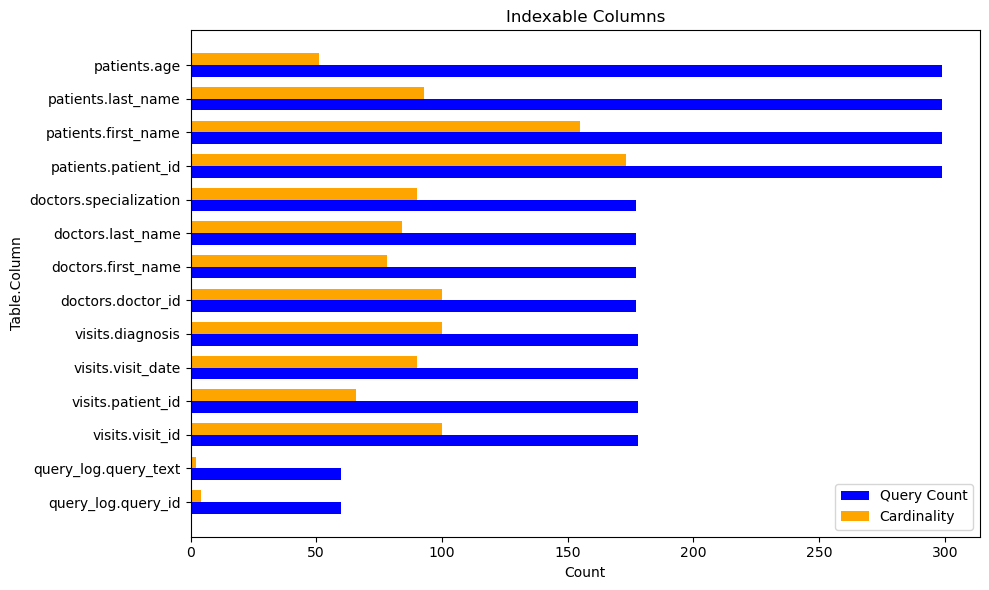

Suggested Index:
Table: patients, Column: patient_id, Data Type: integer
Reasons:
- The column is frequently queried and has high cardinality.
-----------------------------------
Creating index...
Index created for patient_id sucessfully...


In [47]:
import psycopg2
import numpy as np
import matplotlib.pyplot as plt

def get_indexable_columns():
    conn = psycopg2.connect(
        host="localhost",
        database="postgres",
        port="5433",
        user="postgres",
        password="qwerty"
    )
    cursor = conn.cursor()

    # Get the list of all tables in the database
    cursor.execute("SELECT tablename FROM pg_catalog.pg_tables WHERE schemaname='public';")
    tables = cursor.fetchall()

    indexable_columns = []

    for table in tables:
        table_name = table[0]

        # Get the column names and data types for the current table
        cursor.execute(f"SELECT column_name, data_type FROM information_schema.columns WHERE table_name='{table_name}';")
        columns = cursor.fetchall()

        for column in columns:
            column_name = column[0]
            data_type = column[1]

            # Check if the column is frequently queried
            cursor.execute(f"SELECT seq_scan + idx_scan AS query_count FROM pg_stat_user_tables WHERE relname='{table_name}';")
            result = cursor.fetchone()
            query_count = result[0] if result[0] is not None else 0

            # Check the cardinality of the column
            cursor.execute(f"SELECT count(DISTINCT {column_name}) FROM {table_name};")
            cardinality = cursor.fetchone()[0]

            if query_count > 0 and cardinality > 1:
                # Add the column to the indexable columns list
                indexable_columns.append((table_name, column_name, data_type, query_count, cardinality))

    cursor.close()
    conn.close()

    return indexable_columns


def create_index(database, user, password, host, port, table_name, attribute_name):
    conn = psycopg2.connect(database=database, user=user, password=password, host=host, port=port)
    cur = conn.cursor()
    index_name = f"idx_{table_name}_{attribute_name}"
    create_index_sql = f"CREATE INDEX IF NOT EXISTS {index_name} ON {table_name} ({attribute_name});"
    cur.execute(create_index_sql)
    conn.commit()
    cur.close()
    conn.close()
    print("Creating index...")
    


# Usage: Get indexable columns
indexable_columns = get_indexable_columns()

if len(indexable_columns) > 0:
    # Print and visualize the indexable columns information
    for column in indexable_columns:
        table_name = column[0]
        column_name = column[1]
        data_type = column[2]
        query_count = column[3]
        cardinality = column[4]

        # Print information and reasons for choosing the attribute
        print(f"Table: {table_name}, Column: {column_name}, Data Type: {data_type}, Query Count: {query_count}, Cardinality: {cardinality}")

        if query_count > 10 and cardinality > 100:
            print("Reason: The column is frequently queried and has high cardinality.")
        elif query_count > 100:
            print("Reason: The column is frequently queried.")
        elif cardinality > 100:
            print("Reason: The column has high cardinality.")
        else:
            print("Reason: The column meets the minimum criteria.")

        print("**********************************************************************")

    # Visualize the indexable columns
    columns = [f"{column[0]}.{column[1]}" for column in indexable_columns]
    query_counts = [column[3] for column in indexable_columns]
    cardinalities = [column[4] for column in indexable_columns]

    plt.figure(figsize=(10, 6))
    bar_height = 0.35
    index = np.arange(len(columns))
    plt.barh(index, query_counts, height=bar_height, color='blue', label='Query Count')
    plt.barh(index + bar_height, cardinalities, height=bar_height, color='orange', label='Cardinality')
    plt.ylabel('Table.Column')
    plt.xlabel('Count')
    plt.title('Indexable Columns')
    plt.yticks(index + bar_height/2, columns, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Create an index on a specific table and attribute
    database = 'postgres'
    user = 'postgres'
    password = 'qwerty'
    host = 'localhost'
    port = '5433'
    table_name = indexable_columns[0][0]  # Use the first table from the indexable_columns list
    attribute_name = indexable_columns[0][1]  # Use the first column from the indexable_columns list

else:
    print("No indexable columns found in the database.")
 
# Suggest a attribute
    
if len(indexable_columns) > 0:
    # Sort the indexable columns by query count and cardinality in descending order
    indexable_columns.sort(key=lambda x: (x[3], x[4]), reverse=True)

    # Select the attribute with the highest query count and cardinality
    table_name = indexable_columns[0][0]
    column_name = indexable_columns[0][1]
    data_type = indexable_columns[0][2]

    print(f"Suggested Index:")
    print(f"Table: {table_name}, Column: {column_name}, Data Type: {data_type}")

    reasons = []
    if indexable_columns[0][3] > 10 and indexable_columns[0][4] > 100:
        reasons.append("The column is frequently queried and has high cardinality.")
    elif indexable_columns[0][3] > 10:
        reasons.append("The column is frequently queried.")
    elif indexable_columns[0][4] > 100:
        reasons.append("The column has high cardinality.")

    if len(indexable_columns[0]) > 5 and indexable_columns[0][5] is not None:
        reasons.append("The column has a default value.")
    if len(indexable_columns[0]) > 6 and indexable_columns[0][6] == "NO":
        reasons.append("The column is not nullable.")

    if reasons:
        print("Reasons:")
        for reason in reasons:
            print(f"- {reason}")
    else:
        print("Reason: The column meets the minimum criteria.")

    print("-----------------------------------")

# create index for the suggested attribute

create_index(database, user, password, host, port, table_name, column_name)
print(f"Index created for {column_name} sucessfully...")
